In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [9]:
from cipher.caesar import *
from cipher.affine import *
from cipher.keyword_cipher import *
from cipher.column_transposition import *
from cipher.vigenere import *

from support.text_prettify import *
from support.utilities import *
from support.plot_frequency_histogram import *
%matplotlib inline

In [3]:
challenge_number = 7
plaintext_a_filename = f'{challenge_number}a.plaintext'
plaintext_b_filename = f'{challenge_number}b.plaintext'
ciphertext_a_filename = f'{challenge_number}a.ciphertext'
ciphertext_b_filename = f'{challenge_number}b.ciphertext'

In [4]:
ca = open(ciphertext_a_filename).read()
cb = open(ciphertext_b_filename).read()

sca = sanitise(ca)
pca = letters(ca)
pta = depunctuate(ca)

scb = sanitise(cb)
pcb = letters(cb)
ptb = depunctuate(cb)

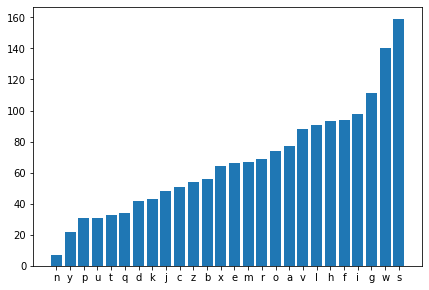

In [6]:
fc = collections.Counter(sca)
plot_frequency_histogram(fc, sort_key=fc.get)

In [10]:
kworda, score = vigenere_frequency_break(sca, fitness=Ptrigrams)
kworda

'soe'

In [14]:
ppa = vigenere_decipher(sca, kworda)
pa = repunctuate(ppa, pta)
print(pa)

Phil,
Sorry I haven’t been in touch much, Churchill asked BOSS to set up an operations wing in the UK under the name of the Special Operations Executive and that has occupied a lot of my time. As soon as we got set up I was put in touch with Einar Skinnarland, an engineer from Vemork who had hijacked a coastal steamer and sailed to Aberdeen to join the war effort here. Churchill ordered us to work up plans to attack the plant and Einar helped us to brief an intelligence gathering team to infiltrate the region. Operation Grouse was launched in October with an advance party of four officers and NCOs led by Jens-Anton Poulsson. They were parachuted into the Hardangervidda as German patrols tended to avoid it, and after a period of observation they prepared the ground for a glider assault. Under the codename Operation Freshman we sent over two gliders carrying commandos equipped with explosives and everything they needed to effect an escape, but a combination of bad weather and bad luck ki

In [15]:
open(plaintext_a_filename, 'w').write(pa)

2147

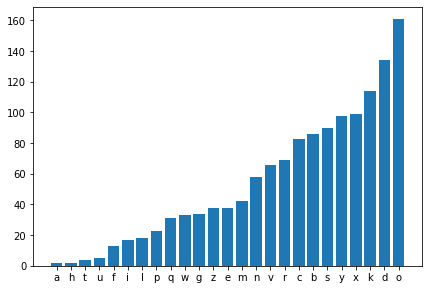

In [16]:
fc = collections.Counter(scb)
plot_frequency_histogram(fc, sort_key=fc.get)

In [18]:
kcb, score = caesar_break(scb, fitness=Pletters)
kcb

10

In [20]:
ccb = caesar_decipher(scb, kcb)
ccb

'etrroopoarnetponuignnredeifsoawrslmotflaewrvorceeiusrgpnlfsperimmeohitscnsooitennirarrsdpoonebnnresmagestttteuooopujnwitawislhoehlttwomawestetfmaetsrervaedoslyfarcscsoonsyurktinaigdnhratptemieydtawotsyvamwkerholtaipreldaohrsddeecfuoehrthmgerifqhetyuchntweahetrhchatmslbeaithofsdleognlioweitpaorfhsnemrnbeahrtdpsieagntgnnhirnieveavhtoreeaermamnifdaeunlaulgryedndatdemmhoacdornguofttplhetriadeatascsuatlulodwerpbnouuvidtectdsiaewitdcehdtaeatmahdlsudosdneetcodnwurhdeteermitosthnrnieveaohtfderibrreevodnlacwihtlbeminohltlesrhaifeerdnaohtgcnhirreevbidawetsiotdfnouessboiplfobtoelsalwiogrtnealkdocosgaawrlyinhtioetlatpnnatnedethycsraawrodreuiwohttuieuotcnnegntiaryranudgtolsechlssaoabenigttnenahltpuilspepdiadtlednaelspnhcaseduasdenltardeihiapdgrnydetstuagohtatntriuhfrececsavcasaailnubtnelwdeniadnenwcoureotingylnntoeerhatckojarhenwnaehsaapoatsicirtnorigoeawwomnsratwneaihltglnoiorecpaoesethatppsprlecimadneshteitwmufidseshteneolrtecoeycslihsmsraeabpnnsaeltaydelhotfsealhsptmoosamnbcuiughenntseahctnpoet

In [21]:
(kwordb, fillb, emptyb), score = column_transposition_break_mp(ccb, fitness=Ptrigrams)
(kwordb, fillb, emptyb), score

(((1, 5, 4, 0, 3, 6, 2), False, False), -4551.751064338015)

In [22]:
pb = column_transposition_decipher(ccb, kwordb, fillcolumnwise=fillb, emptycolumnwise=emptyb)
pb

'reportonoperationgunnersidefromswallowafterrecoveringsuppliesfromthemissioncontainerdropsronnenbergsteamsetouttojoinupwithswallowthetwoteamsmetafterseveraldaysofcrosscountryskiingandthepartymadeitswaytovemorkwhilepatrolshadreducedfromthehighfrequencythatthewehrmachtestablishedfollowingoperationfreshmanthebridgespanningtheravineoverthemanaremainedfullyguardedandthecommandogroupfeltthatadirectassaultwouldbeunproductiveitwasdecidedthatateamshoulddescendtwohundredmetersintotheravinefordtheriverbelowandclimbthehillonthefarsideonreachingtheriverbeditwasfoundtobepossibletofollowasingletrackgoodsrailwayintotheplantandtheentrywascarriedoutwithoutencounteringanyguardsthelocalbossagentintheplantsupplieddetailedplansandschedulesandtheraidingpartyusedthattogainfurtheraccessviaacabletunnelandwindowencounteringonlythecaretakerjohansenwhoasapatrioticnorwegianwasmorethanwillingtocooperatethesappersplacedmineswithtimedfusesontheelectrolysischambersasplannedtheyalsoleftathompsonsubmachinegunatthesceneto

In [23]:
fpb = lcat(tpack(segment(pb)))
print(fpb)

report on operation gunner side from swallow after recovering supplies from the mission container
drops ronn enberg steam set out to join up with swallow the two teams met after several days of
crosscountry skiing and the party made its way to ve mork while patrols had reduced from the high
frequency that the wehrmacht established following operation freshman the bridge spanning the ravine
over the man a remained fully guarded and the commando group felt that a direct assault would be
unproductive it was decided that a team should descend two hundred meters into the ravine ford the
river below and climb the hill on the farside on reaching the riverbed it was found to be possible
to follow a singletrack goods railway into the plant and the entry was carried out without
encountering any guards the local boss agent in the plant supplied detailed plans and schedules and
the raiding party used that to gain further access via a cable tunnel and window encountering only
the caretaker johansen

In [24]:
open(plaintext_b_filename, 'w').write(fpb)

1635

In [25]:
transpositions[kwordb]

['hatreds',
 'lauries',
 'patrols',
 'patrons',
 'petrols',
 'fatheads',
 'lawmaker',
 'occupier',
 'occupies',
 'patricas',
 'payrolls',
 'odourless',
 'patricias',
 'petrifies']